In [3]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [4]:
train= pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))
test= pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','test.csv', 'test.csv'))

In [5]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
train.isnull().any(),test.isnull().any()

(id               False
 comment_text     False
 toxic            False
 severe_toxic     False
 obscene          False
 threat           False
 insult           False
 identity_hate    False
 dtype: bool,
 id              False
 comment_text    False
 dtype: bool)

In [7]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values
list_sentences_train = train["comment_text"]
list_sentences_test = test["comment_text"]

In [68]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [69]:
list_sentences_train

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [118]:
type(list_sentences_train)

pandas.core.series.Series

In [9]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [99]:
list_tokenized_train[0]

[688,
 75,
 1,
 126,
 130,
 177,
 29,
 672,
 4511,
 12052,
 1116,
 86,
 331,
 51,
 2278,
 11448,
 50,
 6864,
 15,
 60,
 2756,
 148,
 7,
 2937,
 34,
 117,
 1221,
 15190,
 2825,
 4,
 45,
 59,
 244,
 1,
 365,
 31,
 1,
 38,
 27,
 143,
 73,
 3462,
 89,
 3085,
 4583,
 2273,
 985]

In [12]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

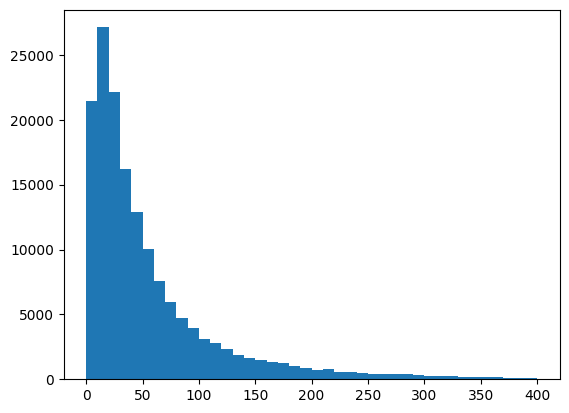

In [13]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.show()

In [35]:
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [113]:
print(X_t[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0   688    75     1
   126   130   177    29   672  4511 12052  1116   

In [36]:
inp = Input(shape=(maxlen, )) 

In [37]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [38]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)

In [39]:
x = GlobalMaxPool1D()(x)

In [40]:
x = Dropout(0.1)(x)


In [20]:
x = Dense(50, activation="relu")(x)

In [21]:
x = Dropout(0.1)(x)

In [22]:
x = Dense(6, activation="sigmoid")(x)

In [23]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [24]:
batch_size = 32
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
4488/4488 [==============================] - 516s 114ms/step - loss: 0.0697 - accuracy: 0.9512 - val_loss: 0.0491 - val_accuracy: 0.9934
Epoch 2/2
4488/4488 [==============================] - 496s 110ms/step - loss: 0.0450 - accuracy: 0.9809 - val_loss: 0.0467 - val_accuracy: 0.9937


In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 lstm_layer (LSTM)           (None, 200, 60)           45360     
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense (Dense)               (None, 50)                3050      
                                                             

In [26]:
from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output = get_3rd_layer_output([X_t[:1]])[0]
layer_output.shape
#print layer_output to see the actual data

(1, 200, 60)

In [44]:
layer_output[0][0]

array([ 0.10235239,  0.03887582,  0.03100076, -0.11149199,  0.11556306,
        0.0449835 , -0.488227  ,  0.01799024, -0.50995106, -0.6281936 ,
       -0.50563085, -0.18656757, -0.2537099 , -0.28986236,  0.00141949,
       -0.00617793, -0.31758088, -0.00812941,  0.11096154,  0.09324954,
       -0.04978893, -0.50615215,  0.07114772, -0.03122762,  0.09625093,
        0.11955252, -0.29905146, -0.04608995, -0.00162549, -0.3976167 ,
        0.06752529, -0.18418297,  0.04378692, -0.06781244,  0.03604857,
        0.03859909,  0.11243277, -0.05719142,  0.04497863, -0.12296712,
        0.07847618,  0.00509186, -0.02999323, -0.013652  ,  0.05751586,
        0.07946336, -0.01541431, -0.3725119 , -0.01880077, -0.02955587,
       -0.31653515, -0.5863255 ,  0.02554966, -0.06573209,  0.09236746,
       -0.48254883, -0.44102785, -0.18174174, -0.5439532 , -0.13293621],
      dtype=float32)

In [138]:
input_str=["Hello how are you?"]
tokenizer.fit_on_texts(list(input_str))
list_tokenized_train1 = tokenizer.texts_to_sequences(input_str)


In [139]:
list_tokenized_train1
X_t1 = pad_sequences(list_tokenized_train1, maxlen=maxlen)
X_t1[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12, 13, 14, 15, 16, 17, 11,
       18, 19,  8, 20,  9, 21, 10, 22, 23,  8,  3, 24, 45])

In [140]:
model.predict(X_t1)

1/1 [==============================] - 0s 59ms/step


array([[1.4839448e-02, 1.2676389e-05, 8.0572319e-04, 5.9659644e-05,
        9.4478019e-04, 2.1152866e-04]], dtype=float32)

In [143]:
y_test = model.predict([X_te], batch_size=1024, verbose=1)
for i in range(len(y_test)):
    if(y_test[i][0]>0.5):
        print(i)
        print(y_test[i])
    

150/150 [==============================] - 82s 546ms/step
0
[0.9981993  0.4188613  0.97503895 0.07403532 0.9171895  0.16396354]
7
[0.52426875 0.00272054 0.09334864 0.00783078 0.13291675 0.01905852]
10
[6.9318026e-01 3.1287107e-04 2.4177027e-01 6.4960780e-04 8.7446094e-02
 2.4169153e-03]
38
[0.52256274 0.00253599 0.3581168  0.00161024 0.10223222 0.01283822]
48
[0.99446535 0.24003258 0.95557076 0.03024364 0.8485431  0.13599025]
56
[0.84489495 0.01372654 0.22608387 0.01882366 0.47166765 0.06271088]
59
[0.9996131  0.40973428 0.9919853  0.01412126 0.9109384  0.07199822]
63
[0.8983103  0.02361605 0.42882037 0.01462544 0.46313342 0.05555343]
70
[0.99951375 0.45399153 0.9901946  0.02116564 0.9343507  0.12009051]
74
[0.8041151  0.00154449 0.16242293 0.00257163 0.29768926 0.0113844 ]
78
[0.8866288  0.01773867 0.23275521 0.01509708 0.56017905 0.06813479]
81
[0.98092675 0.02085658 0.48468938 0.00666343 0.7044097  0.03879326]
92
[0.9910377  0.0595585  0.6911969  0.01613147 0.82950026 0.07639927]
99